In [1]:
#importing neccessary packages

import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data set
data=pd.read_csv('C:/Users/praka/Desktop/naveen/health care diabetes.csv')
temp=pd.read_csv('C:/Users/praka/Desktop/naveen/health care diabetes.csv')

In [3]:
#understanding data

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#descriptive statistics
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [5]:
#some features are 0 in dataset indicating missing values so replacing them with Nan values
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     763 non-null float64
BloodPressure               733 non-null float64
SkinThickness               541 non-null float64
Insulin                     394 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [6]:
#filling missing values
data['Glucose'].fillna( method ='ffill', inplace =True) 
data['BloodPressure'].fillna( method ='ffill', inplace =True) 
data['SkinThickness'].fillna( method ='ffill', inplace =True) 
data['Insulin'].fillna( method ='ffill', inplace =True) 
data['BMI'].fillna( method ='ffill', inplace =True) 
#df['Glucose'].fillna( method ='ffill', inplace =True) 

#still there are few missing values in insulin so replacing them
data['Insulin'] = data['Insulin'].fillna(0)
data['Insulin'] = data['Insulin'].replace(0,100)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


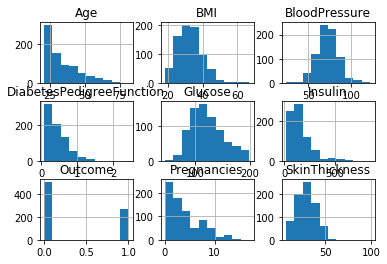

In [7]:
# plotting histogram for all attributes

data.hist()
plt.show()

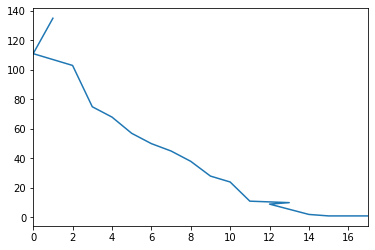

In [8]:
#frequency plot for all variables
(data['Pregnancies'].value_counts()) 
data['Pregnancies'].value_counts().plot()

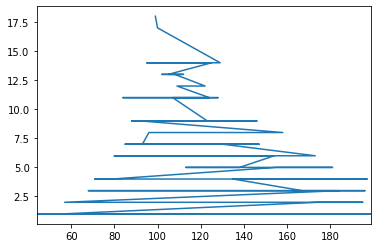

In [9]:
(data['Glucose'].value_counts())
data['Glucose'].value_counts().plot()

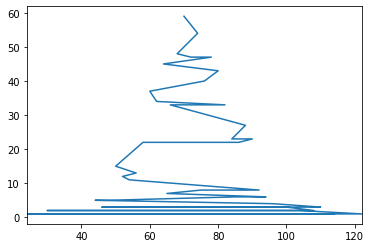

In [10]:
(data['BloodPressure'].value_counts())
data['BloodPressure'].value_counts().plot()

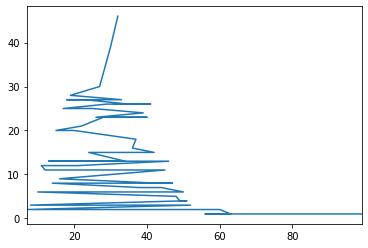

In [11]:
(data['SkinThickness'].value_counts())
data['SkinThickness'].value_counts().plot()

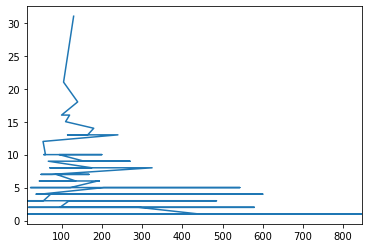

In [12]:
(data['Insulin'].value_counts())
data['Insulin'].value_counts().plot()

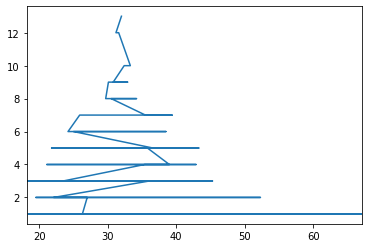

In [13]:
(data['BMI'].value_counts())
data['BMI'].value_counts().plot()

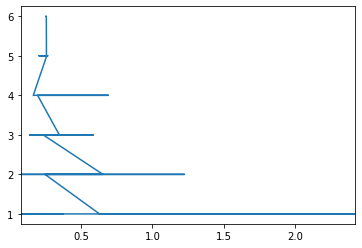

In [14]:
(data['DiabetesPedigreeFunction'].value_counts())
data['DiabetesPedigreeFunction'].value_counts().plot()

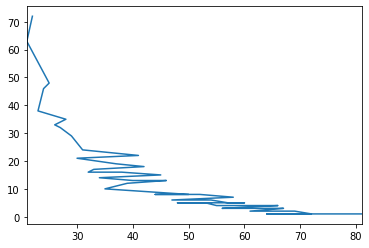

In [15]:
#print(df['Age'].value_counts())
data['Age'].value_counts().plot()

0    500
1    268
Name: Outcome, dtype: int64


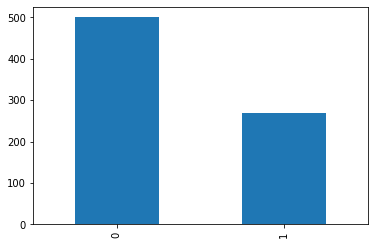

In [16]:
print(data['Outcome'].value_counts())
data['Outcome'].value_counts().plot.bar()
#The number of non-diabetic is 500 the number of diabetic patients is 268

C:\Users\praka\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\praka\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


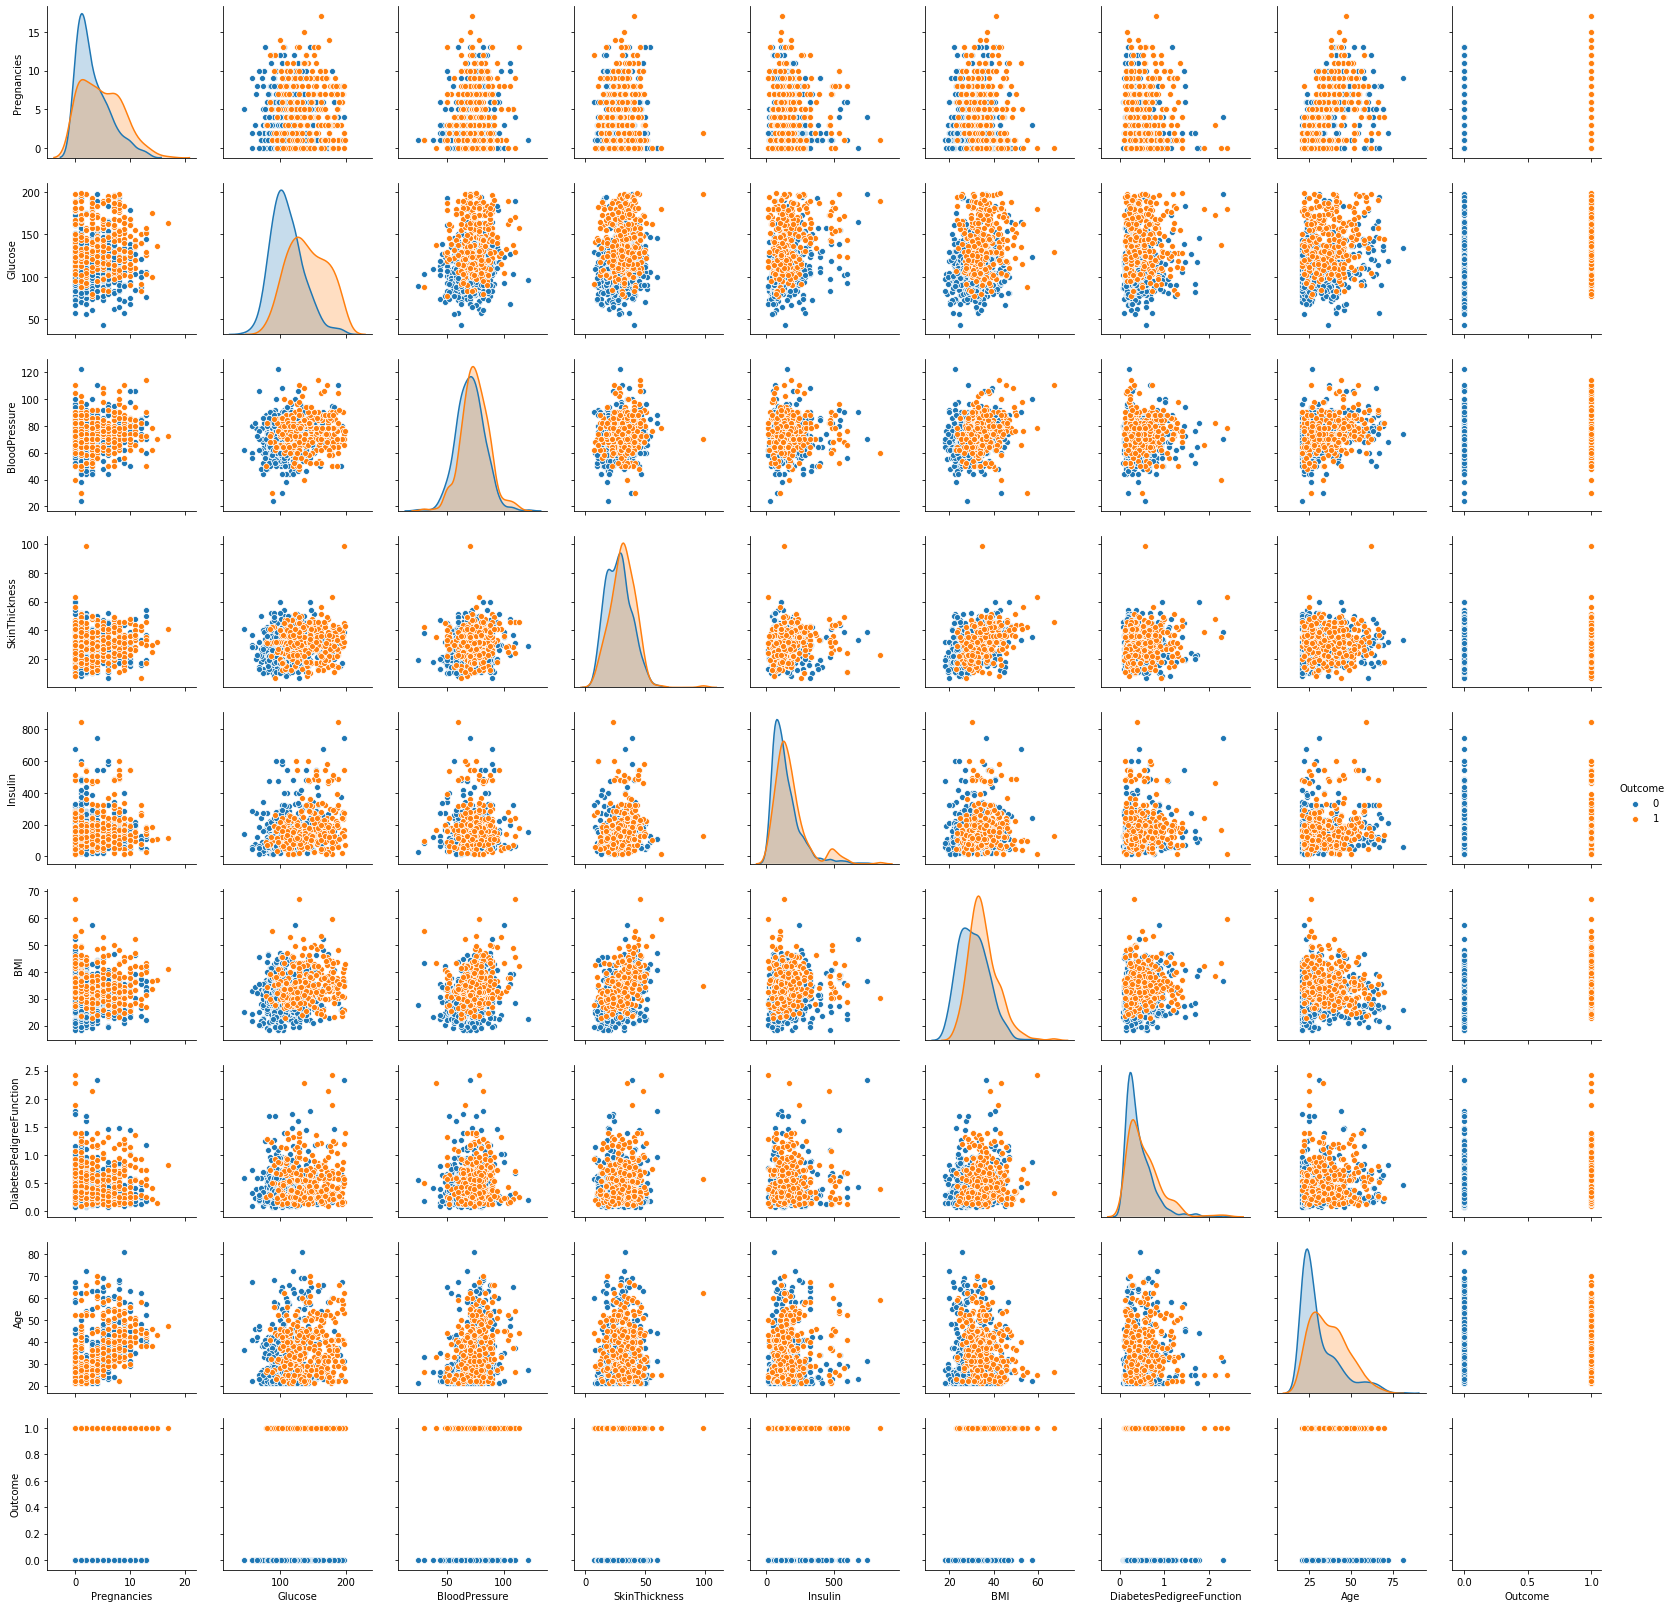

In [17]:
#scatter charts between the pair of variables to understand the relationships
sns.pairplot(data,hue='Outcome')

In [18]:
#Pregnancies and age have some kind of a linear line.
#BloodPressure and age have little relation. Most of the aged people have BloodPressure.
#Insulin and Glucose have some relation.

In [19]:
#correllation between two variables 
cor=data.corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128749,0.193807,0.088314,0.051574,0.022731,-0.033523,0.544341,0.221898
Glucose,0.128749,1.000000,0.214426,0.177872,0.317222,0.228348,0.137932,0.267282,0.490122
BloodPressure,0.193807,0.214426,1.000000,0.177016,0.069794,0.268753,0.001775,0.319892,0.153802
SkinThickness,0.088314,0.177872,0.177016,1.000000,0.101794,0.467647,0.089064,0.147379,0.167967
Insulin,0.051574,0.317222,0.069794,0.101794,1.000000,0.109349,0.084946,0.122629,0.149867
BMI,0.022731,0.228348,0.268753,0.467647,0.109349,1.000000,0.156857,0.022044,0.309940
DiabetesPedigreeFunction,-0.033523,0.137932,0.001775,0.089064,0.084946,0.156857,1.000000,0.033561,0.173844
Age,0.544341,0.267282,0.319892,0.147379,0.122629,0.022044,0.033561,1.000000,0.238356
Outcome,0.221898,0.490122,0.153802,0.167967,0.149867,0.309940,0.173844,0.238356,1.000000


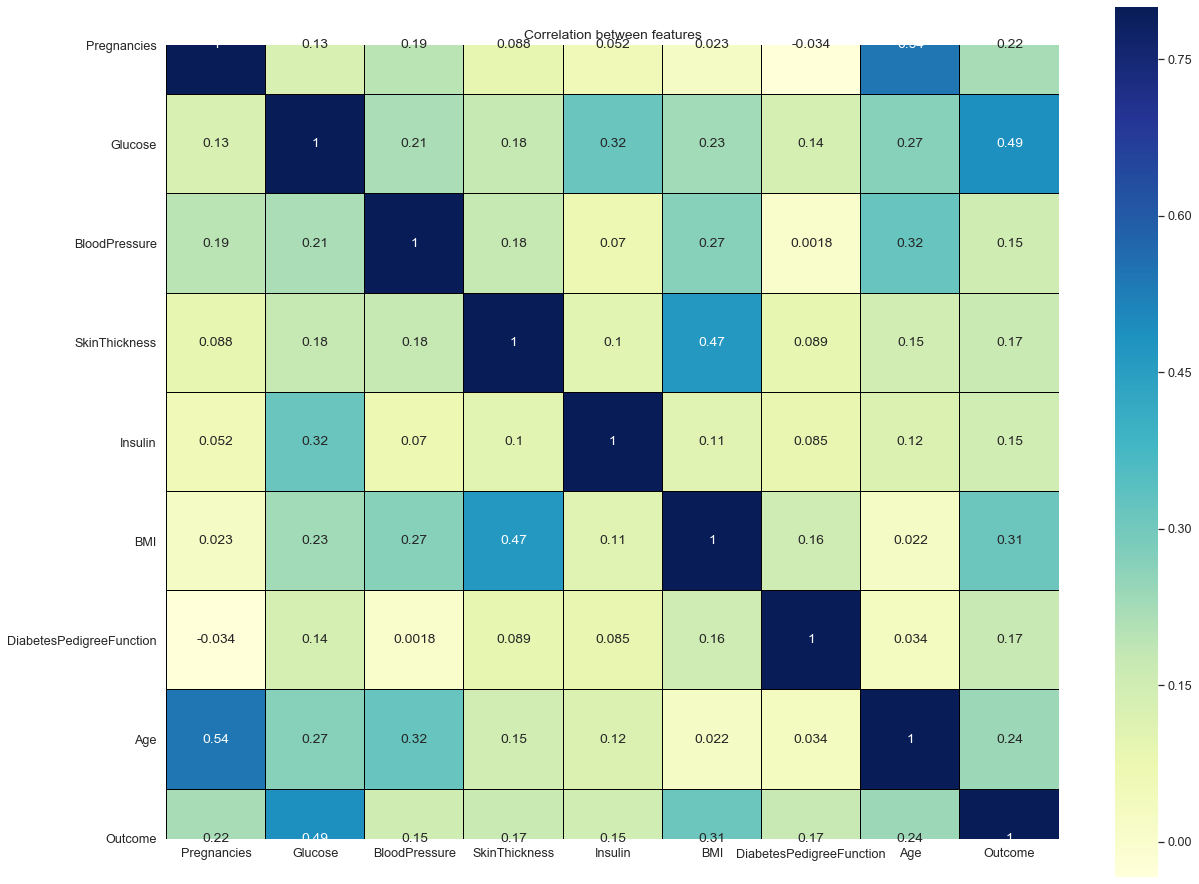

In [20]:
#visualising correllation using heat map
corr=data.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(20, 16))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');


In [21]:
#making groups for age
a=pd.Series([])
for i in data.index:
    if(data.loc[i:i,]['Age']<=24).bool():
        a=a.append(pd.Series(['<=24']))
    elif(data.loc[i:i,]['Age']<=30).bool():
        a=a.append(pd.Series(['25-30']))
    elif(data.loc[i:i,]['Age']<=40).bool():
        a=a.append(pd.Series(['31-40']))
    elif(data.loc[i:i,]['Age']<=55).bool():
        a=a.append(pd.Series(['41-55']))
    else:
        a=a.append(pd.Series(['>55']))
a.reset_index(drop=True,inplace=True)
data['Age']=a

#Find the number of diabetic person in each age group
data1=data[data['Outcome']==1].groupby('Age')[['Outcome']].count()
data
data1.head()

,Outcome
Age,
25-30,59
31-40,76
41-55,85
<=24,31
>55,17


In [22]:
# Percentage of diabetic Person in each age group

data2=data.groupby('Age')[['Outcome']].count()
data1['Diabetic %']=(data1['Outcome']/data2['Outcome'])*100
data1


,Outcome,Diabetic %
Age,,
25-30,59,29.797980
31-40,76,48.407643
41-55,85,59.027778
<=24,31,14.155251
>55,17,34.000000


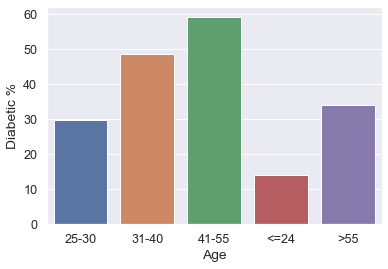

In [23]:
#graph for age
sns.barplot(data1.index,data1['Diabetic %'])

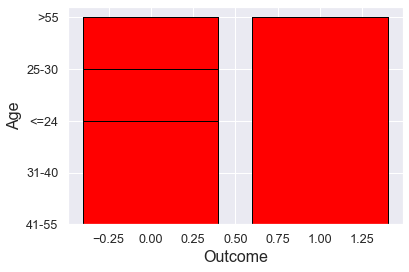

In [24]:
#graph between pregnancy and outcome categorical vs numerical dala
plt.bar(data['Outcome'],data['Age'],color='red',edgecolor='black')
plt.xlabel('Outcome', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.show()

In [25]:
#relation between pregnancy and outcome , categorical vs numerical 
pd.crosstab(data['Pregnancies'],data['Outcome'])

Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


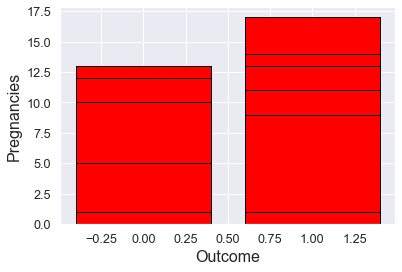

In [26]:
#graph between pregnancy and outcome categorical vs numerical dala
plt.bar(data['Outcome'],data['Pregnancies'],color='red',edgecolor='black')
plt.xlabel('Outcome', fontsize=16)
plt.ylabel('Pregnancies', fontsize=16)
plt.show()


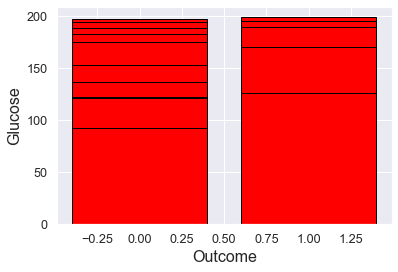

In [27]:
#Graph between glucose and outcome categorical vs numerical data
plt.bar(data['Outcome'],data['Glucose'],color='red',edgecolor='black')
plt.xlabel('Outcome', fontsize=16)
plt.ylabel('Glucose', fontsize=16)
plt.show()

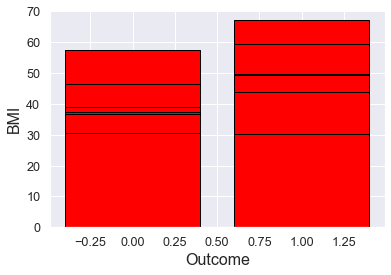

In [28]:
#graph between bmi and outcome, categorical vs numerical data
plt.bar(data['Outcome'],data['BMI'],color='red',edgecolor='black')
plt.xlabel('Outcome', fontsize=16)
plt.ylabel('BMI', fontsize=16)
plt.show()

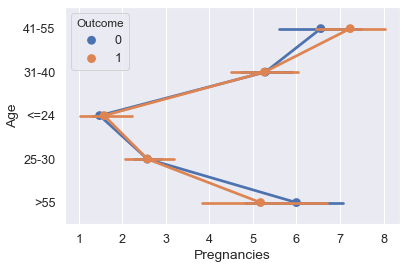

In [29]:
#analysis of pregnancies and age
sns.pointplot(data['Pregnancies'], data['Age'], hue=data['Outcome'])

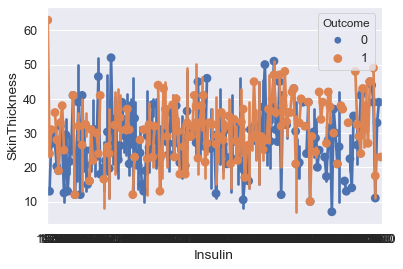

In [30]:
#analysis of insulin and skin thickness
sns.pointplot(data['Insulin'], data['SkinThickness'], hue=data['Outcome'])

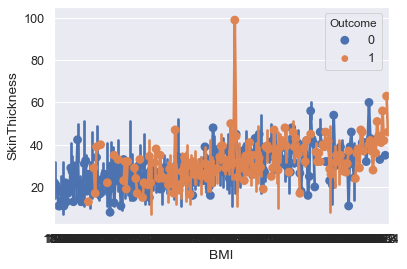

In [31]:
#analysis of BMI and Skin Thickness
sns.pointplot(data['BMI'], data['SkinThickness'], hue=data['Outcome'])

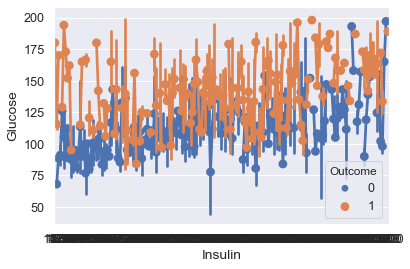

In [32]:
#analysis of Insulin and Glucose
sns.pointplot(data['Insulin'], data['Glucose'], hue=data['Outcome'])

In [33]:
print("The dataset have nine attributes(parameters) in which there are eight independent variables (Pregnancies,Glucose,Blood Pressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age) and one dependent variable (Outcome).BMI and DiabetesPedigreeFunction are a float data type and other parameters are integer data type.The parameters do not contain any null values (missing values). However, this can not be true. As Insulin,SkinThickness,BloodPressure,BMI,Glucose have zero values.The Outcome parameter shows that there are 500 healthy people and 268 Diabetic people.It means that 65% people are diabetic and 34.9% people are healthy.The parameters Glucose, BloodPressure, BMI are normally distributed. Pregnancies,Insulin,Age,DiabetesPedigreeFunction are rightly skewed.The missing values '0' is replaced by the mean of the parameter to explore the dataset.BloodPressure,SkinThickness,Insulin,BMI have outliers.There are no convincing relationship between the parameters.Pregnancies and age have some kind of a linear line. BloodPressure and age have little relation. Most of the aged people have BloodPressure.Insulin and Glucose have some relation.Glucose, Age BMI and Pregnancies are the most Correlated features with the Outcome.Insulin and DiabetesPedigreeFunction have little correlation with the outcome. BloodPressure and SkinThickness have tiny correlation with the outcome.Age and Pregnancies,Insulin and Skin Thickness, BMI and Skin Thickness,Insulin and Glucose are little correlated.The midle aged women are most likely to be diabetic than the young women. As the percentage of diabetic women are 48% and 59% in the age group of 31-40 and 41-55.After Pregnancy people have more chance of diabeties.People with high Glucose level are more likely to have diabeties.People with high BloodPressure have more chance of diabeties.People with high Insulin level are more likely to have Diabetes.*/")


The dataset have nine attributes(parameters) in which there are eight independent variables (Pregnancies,Glucose,Blood Pressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age) and one dependent variable (Outcome).BMI and DiabetesPedigreeFunction are a float data type and other parameters are integer data type.The parameters do not contain any null values (missing values). However, this can not be true. As Insulin,SkinThickness,BloodPressure,BMI,Glucose have zero values.The Outcome parameter shows that there are 500 healthy people and 268 Diabetic people.It means that 65% people are diabetic and 34.9% people are healthy.The parameters Glucose, BloodPressure, BMI are normally distributed. Pregnancies,Insulin,Age,DiabetesPedigreeFunction are rightly skewed.The missing values '0' is replaced by the mean of the parameter to explore the dataset.BloodPressure,SkinThickness,Insulin,BMI have outliers.There are no convincing relationship between the parameters.Pregnancies and age have so

In [34]:
#knn 
data['Age'] = temp['Age']

y = data['Outcome'] 
X = data.drop('Outcome', axis = 1) 

In [35]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,11)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

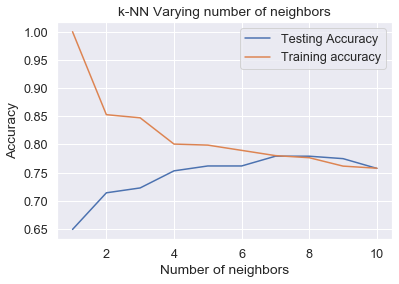

In [38]:
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show() 

In [39]:
for i in range(0,10):
    print("K = ",i+1," Train_accuracy :",train_accuracy[i])
    print("       ","Test_accuracy :",test_accuracy[i])

K =  1  Train_accuracy : 1.0
        Test_accuracy : 0.6493506493506493
K =  2  Train_accuracy : 0.8528864059590316
        Test_accuracy : 0.7142857142857143
K =  3  Train_accuracy : 0.8472998137802608
        Test_accuracy : 0.7229437229437229
K =  4  Train_accuracy : 0.8007448789571695
        Test_accuracy : 0.7532467532467533
K =  5  Train_accuracy : 0.7988826815642458
        Test_accuracy : 0.7619047619047619
K =  6  Train_accuracy : 0.7895716945996276
        Test_accuracy : 0.7619047619047619
K =  7  Train_accuracy : 0.7802607076350093
        Test_accuracy : 0.7792207792207793
K =  8  Train_accuracy : 0.776536312849162
        Test_accuracy : 0.7792207792207793
K =  9  Train_accuracy : 0.7616387337057728
        Test_accuracy : 0.7748917748917749
K =  10  Train_accuracy : 0.7579143389199255
        Test_accuracy : 0.7575757575757576


## Hence we are at a conclusion best K value is 7

In [40]:
knn = KNeighborsClassifier(n_neighbors=7)

In [41]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [43]:
y_pred = knn.predict(X_test)

In [44]:
confusion_matrix(y_test,y_pred)

array([[119,  23],
       [ 28,  61]], dtype=int64)

In [75]:
print("Accuracy :",accuracy_score(y_test,y_pred)*100)

Accuracy : 77.92207792207793


In [46]:
#import classification_report
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       142
           1       0.73      0.69      0.71        89

    accuracy                           0.78       231
   macro avg       0.77      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231



In [48]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

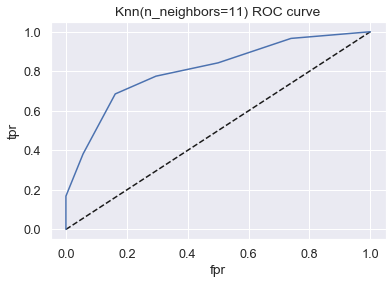

In [49]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [50]:
#decision tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [51]:
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 

In [52]:
def tarin_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 

In [53]:
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 

In [54]:
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred))

In [55]:
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
      
    # Operational Phase 
    print("Results Using Gini Index:") 
      
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
      
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy) 

Results Using Gini Index:
Predicted values:
[1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0
 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0
 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 0]
Confusion Matrix:  [[128  14]
 [ 38  51]]
Accuracy :  77.48917748917748
Report :                precision    recall  f1-score   support

           0       0.77      0.90      0.83       142
           1       0.78      0.57      0.66        89

    accuracy                           0.77       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.77      0.77       231

Results Using Entropy:
Predicted values:
[1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0

In [56]:
# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [57]:
print('Model Accuracy: {tree.score(X, y)}')

Model Accuracy: {tree.score(X, y)}


In [58]:
yp1 = tree.predict(X_test)
print('Decision Tree Accuracy Score')
accuracy_score(y_test,yp1)*100 

Decision Tree Accuracy Score


74.89177489177489

roc_auc_score for DecisionTree:  74.89177489177489


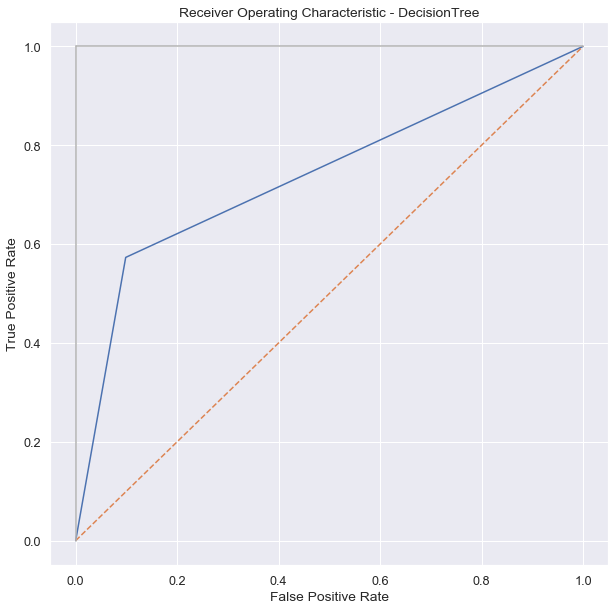

In [65]:
 from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred_entropy)
print('roc_auc_score for DecisionTree: ',accuracy_score(y_test,yp1)*100)

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [76]:
#f1 scores of knn and decision tree

from sklearn.metrics import f1_score
ytrue = y_test
KNNf1= f1_score(ytrue, y_pred, average='weighted') 
KNNf1*100

77.79401829044808

In [77]:
#Decision Tree
DTf1=f1_score(ytrue, yp1, average='weighted') 
DTf1*100

74.77753727753729

In [ ]:
#from the scores we can tell knn is more accurate.